### NBA Draft Class Stats Project

In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#read in the data
statsDF = pd.read_csv("all_seasons.csv")
statsDF.head()
#get averages of common stats by player
stats = ['gp', 'pts', 'reb', 'ast', 'net_rating','oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']
stats_by_player = statsDF.groupby(['player_name','draft_year'])[stats].mean().reset_index()

#create columns for total games played and number of seasons played
total_gp = statsDF.groupby(['player_name', 'draft_year'], as_index = False)['gp'].sum()
seasons_played = statsDF.groupby(['player_name', 'draft_year'], as_index = False)['season'].count()

#add created columns to dataframe
stats_by_player['total_gp'] = total_gp['gp']
stats_by_player['seasons_played'] = seasons_played['season']
stats_by_player['draft_year'] = stats_by_player['draft_year'].replace(to_replace = 'Undrafted', value = 0)
stats_by_player['draft_year'] = pd.to_numeric(stats_by_player['draft_year'])

### Average Points per Draft Year

,draft_year,pts
9,1984,10.84
34,2009,8.33
14,1989,8.08
36,2011,8.04
40,2015,8.02


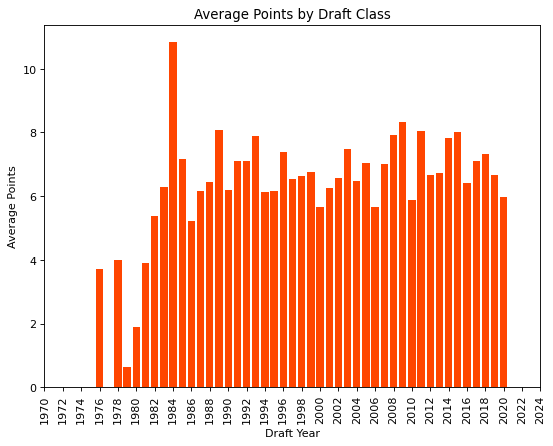

In [413]:
#create df for avg pts by draft year
avg_pts_by_dy = stats_by_player.groupby('draft_year', as_index = False)['pts'].mean()

#plot it ( not a great plot, a little hard to read)
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(avg_pts_by_dy['draft_year'], avg_pts_by_dy['pts'], color = 'orangered')
plt.xlim(1970, 2024)
plt.xticks(np.linspace(1970, 2024, 28), rotation = 90)
plt.xlabel('Draft Year')
plt.ylabel('Average Points')
plt.title('Average Points by Draft Class')

#show the top 5 years and their values
np.round(avg_pts_by_dy.nlargest(5, 'pts'), 2)

### Average Assists Per Draft Year

,draft_year,ast
9,1984,2.58
34,2009,2.22
14,1989,2.21
16,1991,1.89
18,1993,1.88
12,1987,1.84
8,1983,1.74
40,2015,1.72
28,2003,1.71
21,1996,1.59


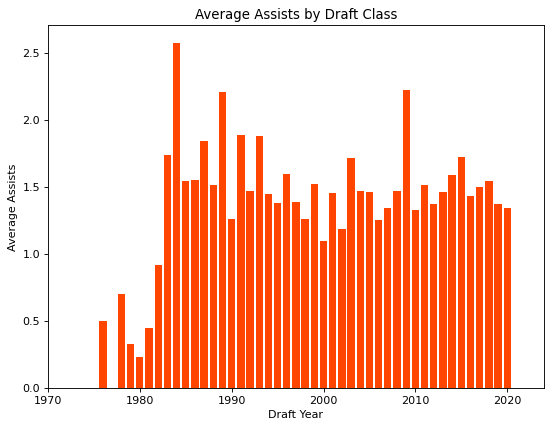

In [426]:
#create df for avg assists by draft year
avg_ast_by_dy = stats_by_player.groupby('draft_year', as_index = False)['ast'].mean()

#plot it
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(avg_ast_by_dy['draft_year'], avg_ast_by_dy['ast'], color = 'orangered')
plt.xlim(1970, 2024)
plt.xlabel('Draft Year')
plt.ylabel('Average Assists')
plt.title("Average Assists by Draft Class")

#show the top 5 years and their values
np.round(avg_ast_by_dy.nlargest(10, 'ast'), 2)

### Average Rebounds by Draft Year

,draft_year,reb
9,1984,5.56
10,1985,3.69
33,2008,3.59
40,2015,3.47
16,1991,3.44
14,1989,3.34
15,1990,3.34
36,2011,3.31
17,1992,3.30
21,1996,3.28


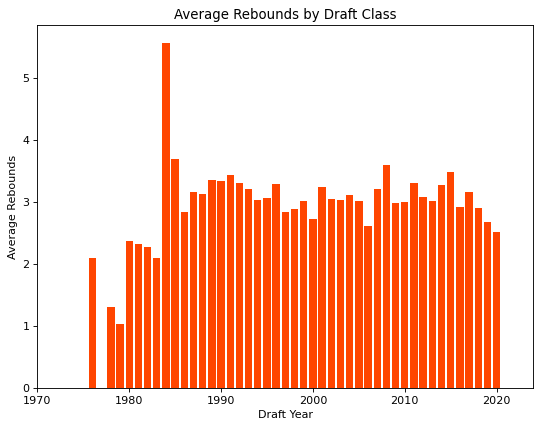

In [415]:
avg_reb_by_dy = stats_by_player.groupby('draft_year', as_index = False)['reb'].mean()

plt.figure(figsize=(8, 6), dpi=80)
plt.bar(avg_ast_by_dy['draft_year'], avg_reb_by_dy['reb'], color = 'orangered')
plt.xlim(1970, 2024)
plt.xlabel('Draft Year')
plt.ylabel('Average Rebounds')
plt.title("Average Rebounds by Draft Class")
np.round(avg_reb_by_dy.nlargest(10, 'reb'), 2)

### Distribution of Points

Text(0.5, 1.0, 'Histogram/Density Estimation of Average Points')

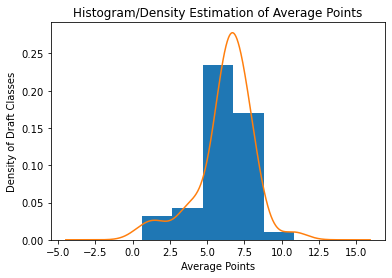

In [404]:
avg_pts_by_dy['pts'].hist(bins = 5, density = True)
avg_pts_by_dy['pts'].plot(kind = 'kde')
plt.xlabel("Average Points")
plt.ylabel("Density of Draft Classes")
plt.title("Histogram/Density Estimation of Average Points")

### Distribution of Assists

Text(0.5, 1.0, 'Histogram/Density Estimation of Average Assists')

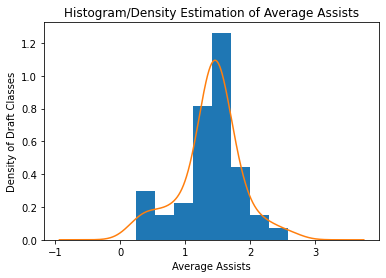

In [405]:
plt.hist(avg_ast_by_dy['ast'], bins = 8, density = True)
avg_ast_by_dy['ast'].plot(kind = 'kde')
plt.xlabel("Average Assists")
plt.ylabel("Density of Draft Classes")
plt.title("Histogram/Density Estimation of Average Assists")

### Distribution of Rebounds

Text(0.5, 1.0, 'Histogram/Density Estimation of Average Rebounds')

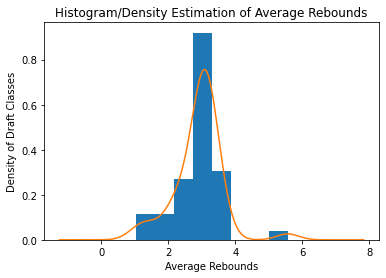

In [406]:
plt.hist(avg_reb_by_dy['reb'], bins = 8, density = True)
avg_reb_by_dy['reb'].plot(kind = 'kde')
plt.xlabel("Average Rebounds")
plt.ylabel("Density of Draft Classes")
plt.title("Histogram/Density Estimation of Average Rebounds")

### Top 10 Highest Scoring Draft Years

,index,draft_year,pts
0,9,1984,10.835450
1,34,2009,8.329422
2,14,1989,8.077737
3,36,2011,8.043529
4,40,2015,8.024275
5,33,2008,7.919022
6,18,1993,7.893232
7,39,2014,7.835220
8,28,2003,7.484866
9,21,1996,7.387114


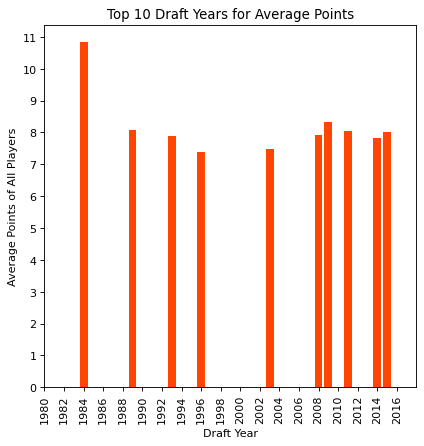

In [416]:
ten_most_pts = avg_pts_by_dy.nlargest(10, 'pts')

plt.figure(figsize=(6, 6), dpi=80)
plt.bar(ten_most_pts['draft_year'], ten_most_pts['pts'], color = 'orangered')
plt.xlim(1980, 2018)
plt.xticks(np.linspace(1980, 2016, 19), rotation = 90)
plt.yticks(np.linspace(0, 11, 12))
plt.xlabel('Draft Year')
plt.ylabel('Average Points of All Players')
plt.title("Top 10 Draft Years for Average Points")
ten_most_pts.reset_index()

### Top Ten Assisting Draft Years

,draft_year,ast
9,1984,2.575212
34,2009,2.224695
14,1989,2.207364
16,1991,1.887582
18,1993,1.877549
12,1987,1.841430
8,1983,1.735000
40,2015,1.724094
28,2003,1.712315
21,1996,1.591610


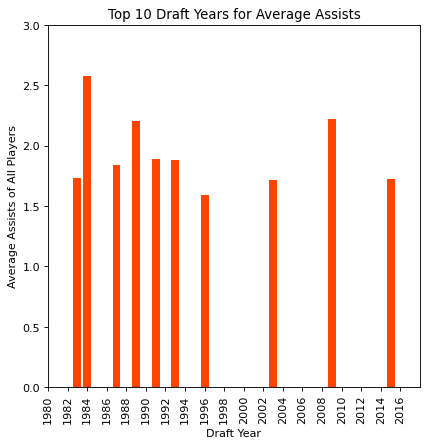

In [425]:
ten_most_ast = avg_ast_by_dy.nlargest(10, 'ast')

plt.figure(figsize=(6, 6), dpi=80)
plt.bar(ten_most_ast['draft_year'], ten_most_ast['ast'], color = 'orangered')
plt.xlim(1980, 2018)
plt.xticks(np.linspace(1980, 2016, 19), rotation = 90)
plt.yticks(np.linspace(0, 3, 7))
plt.xlabel('Draft Year')
plt.ylabel('Average Assists of All Players')
plt.title("Top 10 Draft Years for Average Assists")
ten_most_ast

### Ten Best Rebounding Draft Years

,draft_year,reb
9,1984,5.564048
10,1985,3.690516
33,2008,3.590687
40,2015,3.473007
16,1991,3.438063
14,1989,3.342404
15,1990,3.335318
36,2011,3.307918
17,1992,3.297305
21,1996,3.281165


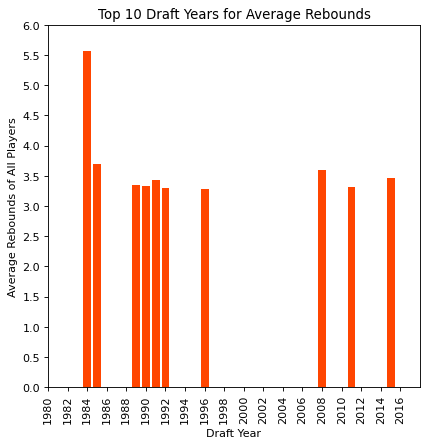

In [424]:
ten_most_reb = avg_reb_by_dy.nlargest(10, 'reb')

plt.figure(figsize=(6, 6), dpi=80)
plt.bar(ten_most_reb['draft_year'], ten_most_reb['reb'], color = 'orangered')
plt.xlim(1980, 2018)
plt.xticks(np.linspace(1980, 2016, 19), rotation = 90)
plt.yticks(np.linspace(0, 6, 13))
plt.xlabel('Draft Year')
plt.ylabel('Average Rebounds of All Players')
plt.title("Top 10 Draft Years for Average Rebounds")
ten_most_reb

### Box Plots of Top 5 Scoring Draft Years

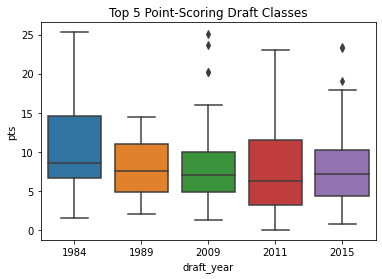

In [290]:
import seaborn as sns

top_5_pts_dy = stats_by_player[stats_by_player['draft_year'] == 1984]
top_5_pts_dy = top_5_pts_dy.append(stats_by_player[stats_by_player['draft_year'] == 1989])
top_5_pts_dy = top_5_pts_dy.append(stats_by_player[stats_by_player['draft_year'] == 2009])
top_5_pts_dy = top_5_pts_dy.append(stats_by_player[stats_by_player['draft_year'] == 2011])
top_5_pts_dy = top_5_pts_dy.append(stats_by_player[stats_by_player['draft_year'] == 2015]).reset_index()

p = sns.boxplot(x='draft_year', y='pts', data=top_5_pts_dy).set_title('Top 5 Point-Scoring Draft Classes')


### Average Scoring Without the Outlier of Michael Jordan

Text(0.5, 1.0, 'Average Points by Draft Class')

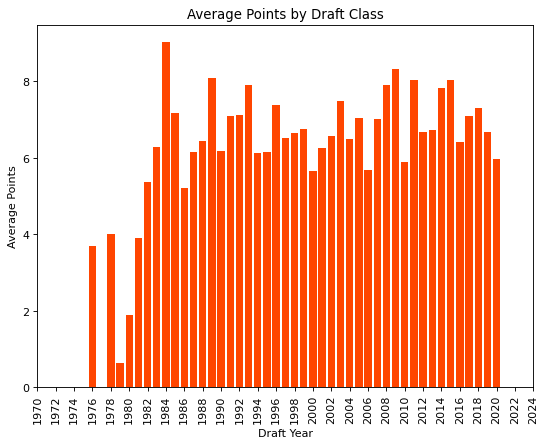

In [291]:
stats_no_MJ = stats_by_player[stats_by_player['player_name'] != 'Michael Jordan']
avg_pts_by_dy_nomj = stats_no_MJ.groupby('draft_year', as_index = False)['pts'].mean()

plt.figure(figsize=(8, 6), dpi=80)
plt.bar(avg_pts_by_dy_nomj['draft_year'], avg_pts_by_dy_nomj['pts'], color = 'orangered')
plt.xlim(1970, 2024)
plt.xticks(np.linspace(1970, 2024, 28), rotation = 90)
plt.xlabel('Draft Year')
plt.ylabel('Average Points')
plt.title('Average Points by Draft Class')

### Top 10 Scoring without MJ

,draft_year,pts
9,1984,9.027381
34,2009,8.329422
14,1989,8.077737
36,2011,8.043529
40,2015,8.024275
33,2008,7.919022
18,1993,7.893232
39,2014,7.835220
28,2003,7.484866
21,1996,7.387114


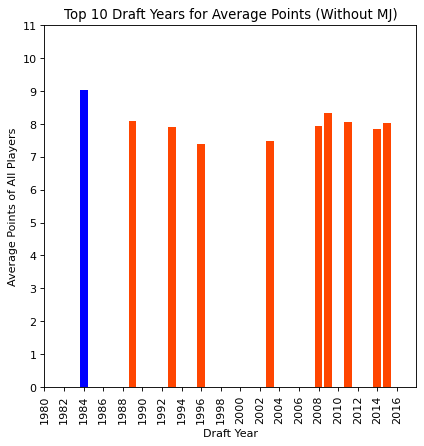

In [409]:
ten_most_pts = avg_pts_by_dy_nomj.nlargest(10, 'pts')

plt.figure(figsize=(6, 6), dpi=80)
plt.bar(ten_most_pts['draft_year'], ten_most_pts['pts'], color = ['blue', 'orangered','orangered','orangered','orangered','orangered','orangered','orangered','orangered','orangered'])
plt.xlim(1980, 2018)
plt.xticks(np.linspace(1980, 2016, 19), rotation = 90)
plt.yticks(np.linspace(0, 11, 12))
plt.xlabel('Draft Year')
plt.ylabel('Average Points of All Players')
plt.title("Top 10 Draft Years for Average Points (Without MJ)")
ten_most_pts

### Top Ten Assisting without John Stockton (NBA All-Time Assist Leader)

,draft_year,ast
34,2009,2.224695
14,1989,2.207364
16,1991,1.887582
18,1993,1.877549
12,1987,1.841430
9,1984,1.831042
8,1983,1.735000
40,2015,1.724094
28,2003,1.712315
21,1996,1.591610


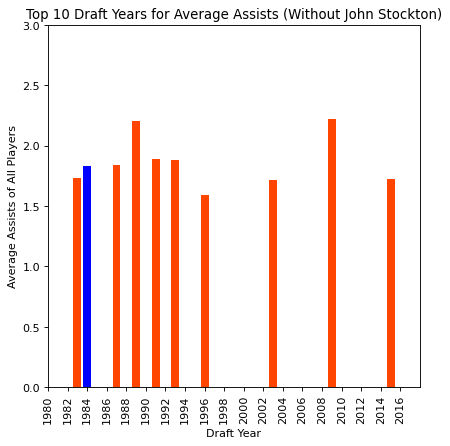

In [410]:
stats_no_JS = stats_by_player[stats_by_player['player_name'] != 'John Stockton']
avg_ast_by_dy_nojs = stats_no_JS.groupby('draft_year', as_index = False)['ast'].mean()

ten_most_ast = avg_ast_by_dy_nojs.nlargest(10, 'ast')
plt.figure(figsize=(6, 6), dpi=80)
plt.bar(ten_most_ast['draft_year'], ten_most_ast['ast'], color = ['orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'blue', 'orangered', 'orangered', 'orangered', 'orangered'])
plt.xlim(1980, 2018)
plt.xticks(np.linspace(1980, 2016, 19), rotation = 90)
plt.yticks(np.linspace(0, 3, 7))
plt.xlabel('Draft Year')
plt.ylabel('Average Assists of All Players')
plt.title("Top 10 Draft Years for Average Assists (Without John Stockton)")
ten_most_ast

### Total Production (Pts + Rebs + ast)

    draft_year  tot_prod
9         1984     18.97
14        1989     13.63
34        2009     13.54
40        2015     13.22
18        1993     12.98
33        2008     12.98
36        2011     12.86
39        2014     12.68
10        1985     12.42
16        1991     12.42


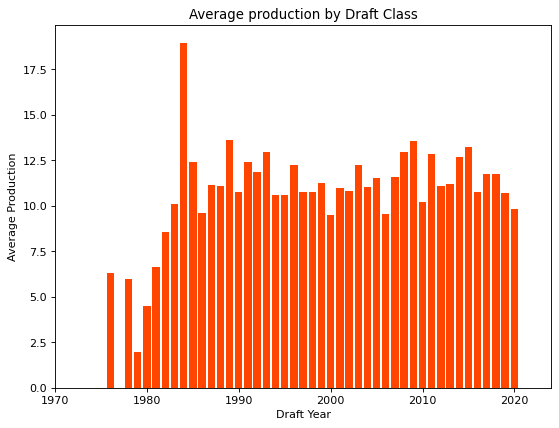

In [307]:
tot_off_df = stats_by_player[['player_name', 'draft_year', 'pts', 'ast', 'reb']]
stats_by_player['tot_prod'] = stats_by_player['pts'] + stats_by_player['ast']+stats_by_player['reb']
avg_prod_by_dy = stats_by_player.groupby('draft_year', as_index = False)['tot_prod'].mean()
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(avg_prod_by_dy['draft_year'], avg_prod_by_dy['tot_prod'], color = 'orangered')
plt.xlim(1970, 2024)
plt.xlabel('Draft Year')
plt.ylabel('Average Production')
plt.title("Average production by Draft Class")
print(np.round(avg_prod_by_dy.nlargest(10, 'tot_prod'), 2))

### Top 10 Total Production

,index,draft_year,tot_prod
0,9,1984,18.974709
1,14,1989,13.627504
2,34,2009,13.539959
3,40,2015,13.221377
4,18,1993,12.981154
5,33,2008,12.980538
6,36,2011,12.862355
7,39,2014,12.684405
8,10,1985,12.417937
9,16,1991,12.417282


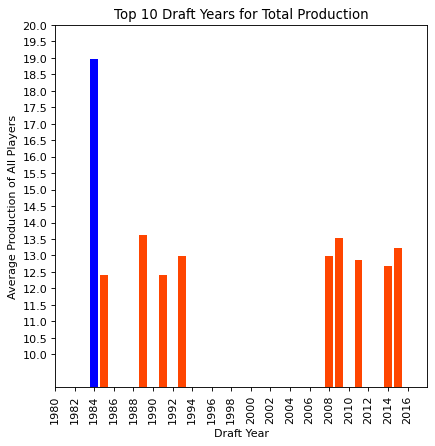

In [411]:
ten_most_prod = avg_prod_by_dy.nlargest(10, 'tot_prod')
plt.figure(figsize=(6, 6), dpi=80)
plt.bar(ten_most_prod['draft_year'], ten_most_prod['tot_prod'], color = ['blue', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered'])
plt.xlim(1980, 2018)
plt.ylim(9, 20)
plt.xticks(np.linspace(1980, 2016, 19), rotation = 90)
plt.yticks(np.linspace(10, 20, 21))
plt.xlabel('Draft Year')
plt.ylabel('Average Production of All Players')
plt.title("Top 10 Draft Years for Total Production")
ten_most_prod.reset_index()

### Total Production Scatter Plot with Mean Line

<Figure size 1080x1080 with 0 Axes>

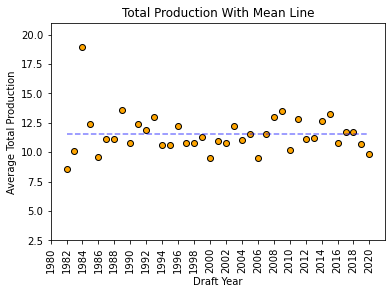

<Figure size 1080x1080 with 0 Axes>

In [418]:
avg_prod_by_dy = avg_prod_by_dy[avg_prod_by_dy['draft_year'] >= 1982]

y_mean = [avg_prod_by_dy['tot_prod'].mean() for i in np.linspace(1974, 2020, 39)]
plt.scatter(avg_prod_by_dy['draft_year'], avg_prod_by_dy['tot_prod'], edgecolor = 'black', facecolors = 'orange')
plt.plot(avg_prod_by_dy['draft_year'], y_mean, linestyle = 'dashed', color = 'blue', alpha = .5)
plt.xlim(1980, 2022)
plt.xticks(np.linspace(1980, 2020, 21), rotation = 90)
plt.ylim(2.5, 21)
plt.xlabel("Draft Year")
plt.ylabel('Average Total Production')
plt.title("Total Production With Mean Line")
plt.figure(figsize = (15,15))

In [427]:
#Create Df of Top 3 total production

top3_off_df = tot_off_df[tot_off_df['draft_year'] == 1984]
top3_off_df = top3_off_df.append(tot_off_df[tot_off_df['draft_year'] == 1989])
top3_off_df = top3_off_df.append(tot_off_df[tot_off_df['draft_year'] == 2009])
#tot_off_df

### Pairplot of Top 3 Producing Draft Years (Pts, Ast, Reb)

Text(0.5, 1.1, 'Big 3 Stats of Top 3 Draft Years')

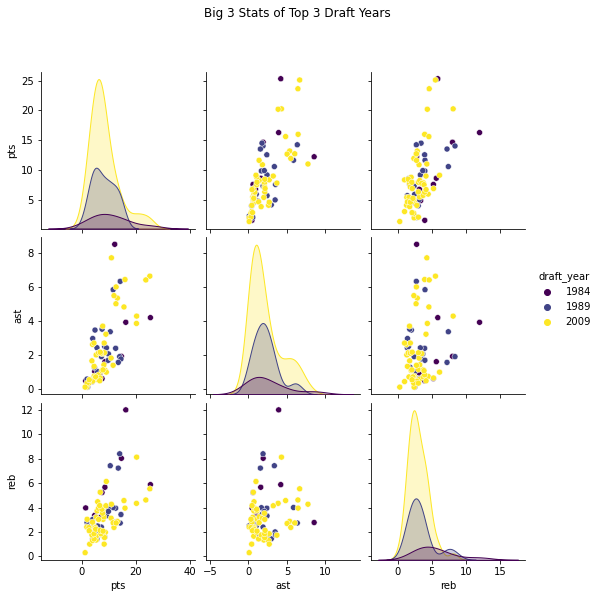

In [421]:
sns.color_palette("viridis", as_cmap=True)
p = sns.pairplot(top3_off_df, hue = 'draft_year', palette = 'viridis')
p.fig.suptitle("Big 3 Stats of Top 3 Draft Years", y = 1.1)

### Find Number of Players per Draft Year

In [428]:
player_counts = stats_by_player.groupby('draft_year', as_index = False).count()
#print(player_counts)
drop_small_df = stats_by_player[stats_by_player['draft_year'] >= 1987]


### New Top 3 Producing Draft Years (After Removing Small Draft Classes)

In [335]:
new_top_3 = tot_off_df[tot_off_df['draft_year'] == 2009]
new_top_3 = new_top_3.append(tot_off_df[tot_off_df['draft_year'] == 2015])
new_top_3 = new_top_3.append(tot_off_df[tot_off_df['draft_year'] == 1993])


Text(0.5, 1.1, 'Big 3 Stats of Top 3 Draft Years (After Removing Small Drafts)')

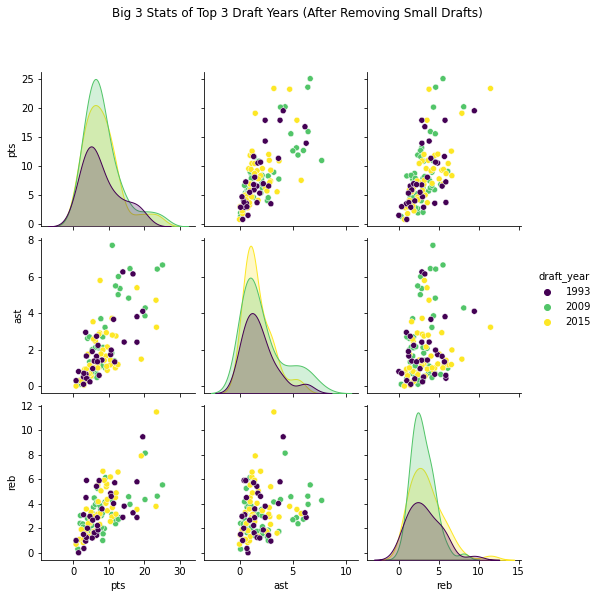

In [420]:
p = sns.pairplot(new_top_3, hue = 'draft_year', palette = 'viridis')
p.fig.suptitle("Big 3 Stats of Top 3 Draft Years (After Removing Small Drafts)", y = 1.1)

### Regression Line of Total Shooting Percentage

Regression line equation: y =  0.0014 *x +  -2.273


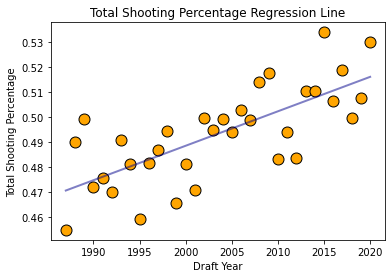

In [367]:
tot_shoot_eff = drop_small_df.groupby('draft_year', as_index = False)['ts_pct'].mean()

plt.plot(tot_shoot_eff['draft_year'], tot_shoot_eff['ts_pct'], 'o', c = 'orange', mec = 'black', ms = 11)
m, b = np.polyfit(tot_shoot_eff['draft_year'], tot_shoot_eff['ts_pct'], 1)
plt.plot(tot_shoot_eff['draft_year'], m*tot_shoot_eff['draft_year'] + b, c = 'darkblue', lw = 2, alpha = .5)
print("Regression line equation: y = ", np.round(m, 4), '*x + ', np.round(b,3))
plt.xlabel("Draft Year")
plt.ylabel("Total Shooting Percentage")
plt.title("Total Shooting Percentage Regression Line")
plt.show()

### Top 5 Draft Years by Average Player Net Rating (For Players with 50+ GP)

In [401]:
total_gp_df = drop_small_df.groupby('draft_year', as_index = False)['net_rating'].mean()
print(total_gp_df.nlargest(5,'net_rating'))

top5_gp = drop_small_df[drop_small_df['draft_year'] == 2009]
top5_gp = top5_gp.append(drop_small_df[drop_small_df['draft_year'] == 1991])
top5_gp = top5_gp.append(drop_small_df[drop_small_df['draft_year'] == 2003])
top5_gp = top5_gp.append(drop_small_df[drop_small_df['draft_year'] == 1988])
top5_gp = top5_gp.append(drop_small_df[drop_small_df['draft_year'] == 2002])
top5_gp = top5_gp[top5_gp['total_gp'] >= 50]

    draft_year  net_rating
4         1991   -0.687420
16        2003   -0.968077
1         1988   -1.231076
22        2009   -1.713906
15        2002   -1.869773


Text(0.5, 1.0, 'Net Rating - 50+ Games Played (Top 5 Avg Net Rating Drafts)')

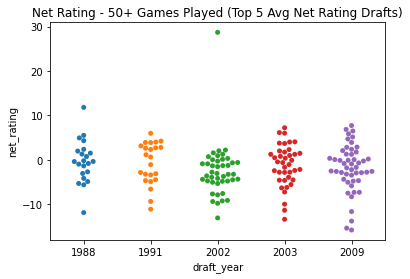

In [403]:
sns.swarmplot(x = 'draft_year', y = 'net_rating', data = top5_gp).set_title('Net Rating - 50+ Games Played (Top 5 Avg Net Rating Drafts)')

### Top 5 Draft Years by Total Games Played per Player

In [429]:
total_games_df = drop_small_df.groupby('draft_year', as_index = False)['total_gp'].mean()
print(total_games_df.nlargest(5,'total_gp'))

top5_games = drop_small_df[drop_small_df['draft_year'] == 2003]
top5_games = top5_games.append(drop_small_df[drop_small_df['draft_year'] == 1996])
top5_games = top5_games.append(drop_small_df[drop_small_df['draft_year'] == 2001])
top5_games = top5_games.append(drop_small_df[drop_small_df['draft_year'] == 2008])
top5_games = top5_games.append(drop_small_df[drop_small_df['draft_year'] == 2005])
#top5_games

    draft_year    total_gp
16        2003  549.574468
9         1996  492.595745
14        2001  465.530612
21        2008  453.686275
18        2005  445.200000


Text(0.5, 1.0, 'Total Games Played By Draft Year (Top 5 Avg Games Played)')

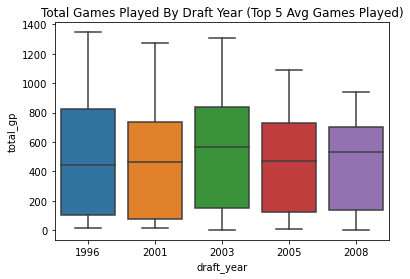

In [419]:
sns.boxplot(x = 'draft_year', y = 'total_gp', data = top5_games).set_title('Total Games Played By Draft Year (Top 5 Avg Games Played)')